In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

##data downloaded from github 

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

checking the column names

In [4]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


checking the null values using heatmap, so to check this in values we will use below command

In [6]:
df.shape
#data has 40 columns and 1000 rows

(1000, 40)

<AxesSubplot:>

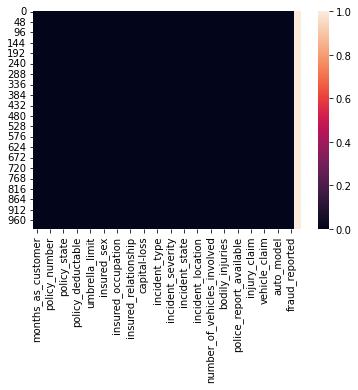

In [7]:
sns.heatmap(df.isnull())

# checking the count of null values

In [8]:
df.isnull().sum()


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# we will require encoding to convert oject into float which we will do later

In [9]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

In [10]:
df.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [11]:
#Need to remove _c39 as this column is totally blank
df1=df.drop(["_c39"],axis=1)
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Now checking the null value status

In [12]:
df1.isnull().sum()
#There is no null

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:>

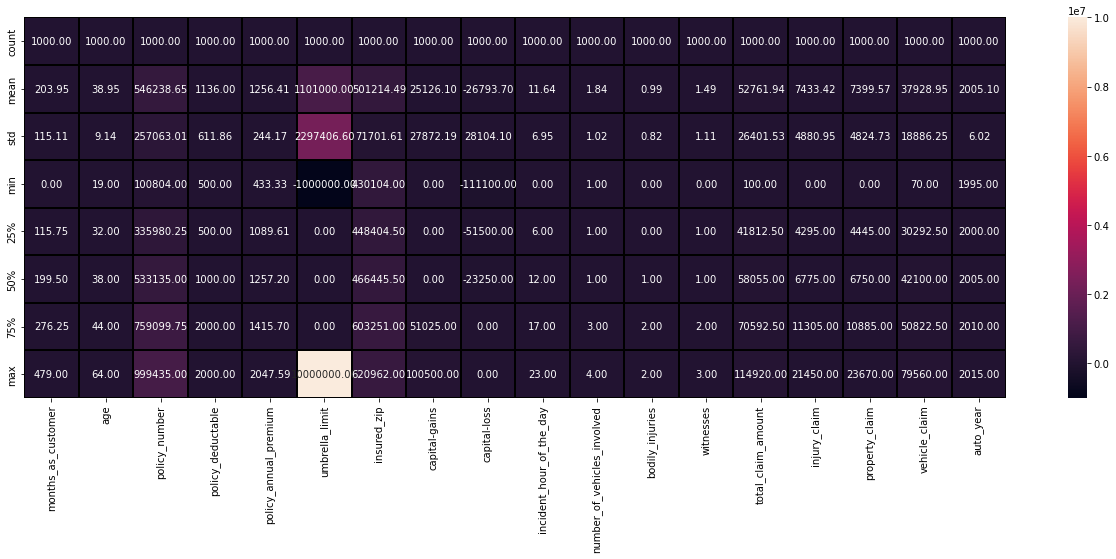

In [13]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df1.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Above we can see data has outliers which we will remove later however we will first convert object datatypes to string using ordinal encoder


In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [16]:
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=enc.fit_transform(df1[i].values.reshape(-1,1))

In [17]:
df1.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date               float64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_date                  float64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_location              float64
incident_hour_of_the_day 

Above we have replaced null values and then converted all float to string, now we will check correlation and individual column data distribution

In [18]:
#now we will check correlation using tables and charts
dfcorr=df1.corr()
dfcorr


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


<AxesSubplot:>

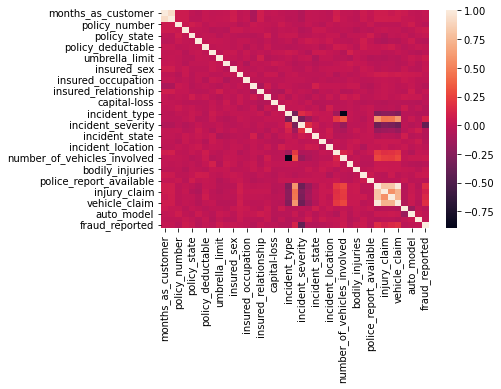

In [19]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [20]:
dfcorr["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


From the above checks using correlation ,we can see most of the columns have very low correlation with our target hence as per my understanding of the columns we willdrop 
'insured_zip','witnesses','bodily_injuries','insured_sex','policy_state','policy_deductable','age','insured_education_level','auto_year','incident_hour_of_the_day','insured_occupation','auto_model','incident_location','policy_annual_premium','capital-loss','capital-gains','auto_make','police_report_available','policy_number','property_damage','policy_csl','incident_city','authorities_contacted','incident_date','incident_type','incident_state','injury_claim', 'property_claim'


In [25]:
df2=df1.drop(['insured_zip','witnesses','bodily_injuries','insured_sex','policy_state','policy_deductable','age','insured_education_level','auto_year','incident_hour_of_the_day','insured_occupation','auto_model','incident_location','policy_annual_premium','capital-loss','capital-gains','auto_make','police_report_available','policy_number','property_damage','policy_csl','incident_city','authorities_contacted','incident_date','incident_type','incident_state','injury_claim', 'property_claim'
],axis=1)
df2

,months_as_customer,policy_bind_date,umbrella_limit,insured_hobbies,insured_relationship,collision_type,incident_severity,number_of_vehicles_involved,total_claim_amount,vehicle_claim,fraud_reported
0,328,532.0,0,17.0,0.0,3.0,0.0,1,71610,52080,1.0
1,228,821.0,5000000,15.0,2.0,0.0,1.0,1,5070,3510,1.0
2,134,186.0,5000000,2.0,3.0,2.0,1.0,3,34650,23100,0.0
3,256,766.0,6000000,2.0,4.0,1.0,0.0,1,63400,50720,1.0
4,228,181.0,6000000,2.0,4.0,0.0,1.0,1,6500,4550,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,3,487.0,0,13.0,4.0,1.0,1.0,1,87200,61040,0.0
996,285,129.0,0,17.0,5.0,2.0,0.0,1,108480,72320,0.0
997,130,509.0,3000000,3.0,2.0,3.0,1.0,3,67500,52500,0.0
998,458,573.0,5000000,0.0,5.0,2.0,0.0,1,46980,36540,0.0


In [26]:
df2.columns

Index(['months_as_customer', 'policy_bind_date', 'umbrella_limit',
       'insured_hobbies', 'insured_relationship', 'collision_type',
       'incident_severity', 'number_of_vehicles_involved',
       'total_claim_amount', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

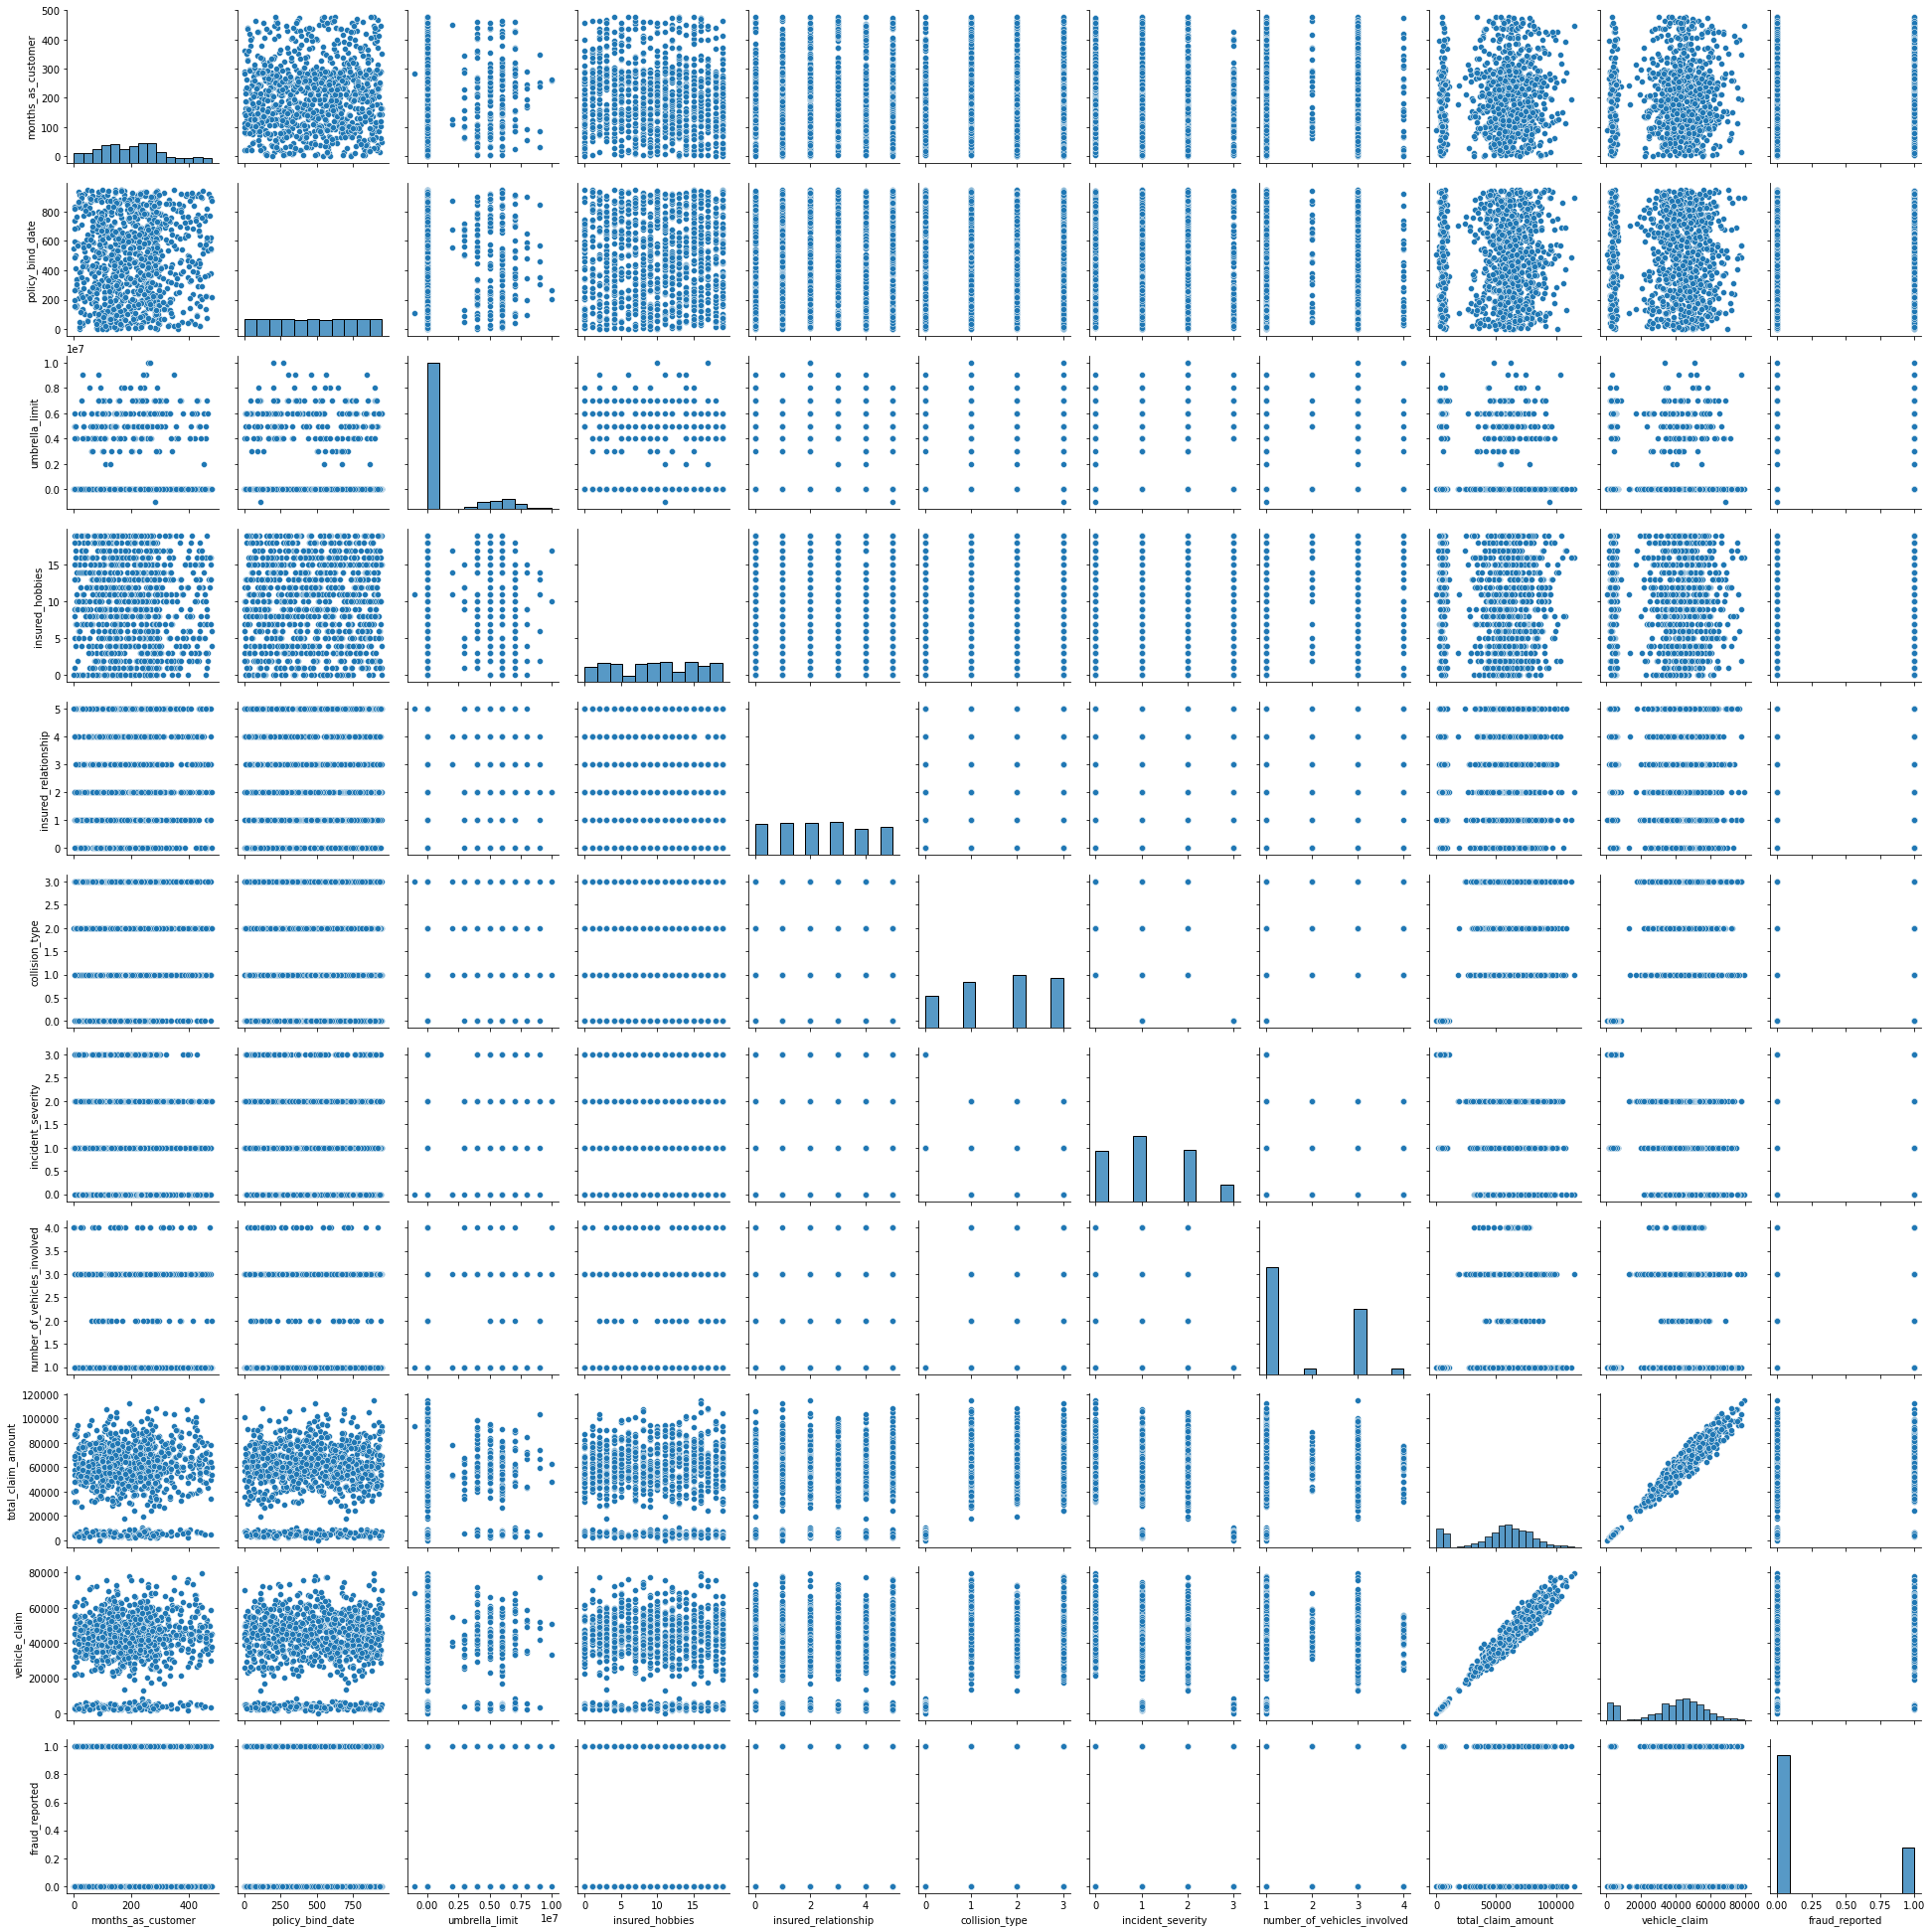

In [27]:
sns.pairplot(df2)
#to visually see positive , negative colrrelat

In [28]:
df2.columns

Index(['months_as_customer', 'policy_bind_date', 'umbrella_limit',
       'insured_hobbies', 'insured_relationship', 'collision_type',
       'incident_severity', 'number_of_vehicles_involved',
       'total_claim_amount', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

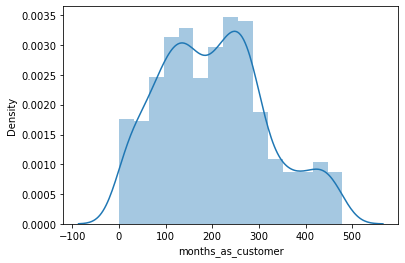

In [29]:
#we will check the data distribution using distplots
sns.distplot(df2['months_as_customer'])

<AxesSubplot:xlabel='policy_bind_date', ylabel='Density'>

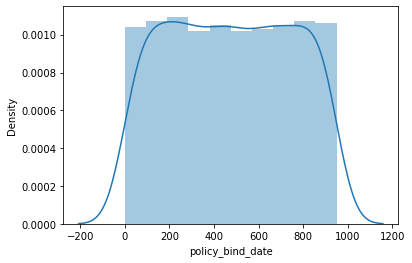

In [30]:
sns.distplot(df2['policy_bind_date'])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

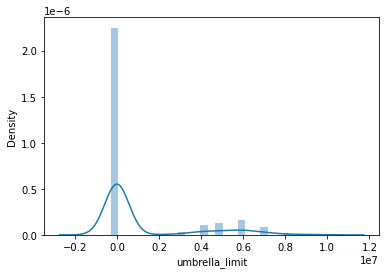

In [31]:
sns.distplot(df2['umbrella_limit'])

<AxesSubplot:xlabel='insured_hobbies', ylabel='Density'>

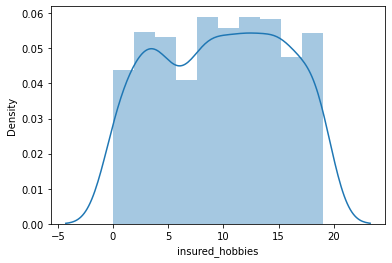

In [32]:
sns.distplot(df2['insured_hobbies'])

<AxesSubplot:xlabel='insured_relationship', ylabel='Density'>

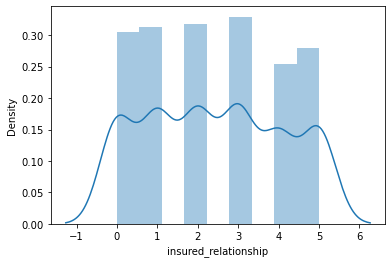

In [33]:
sns.distplot(df2['insured_relationship'])

<AxesSubplot:xlabel='collision_type', ylabel='Density'>

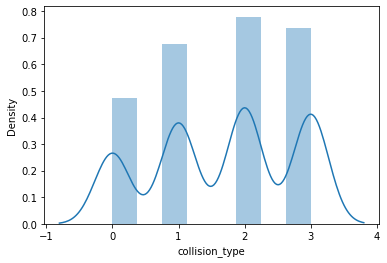

In [34]:
sns.distplot(df2['collision_type'])

<AxesSubplot:xlabel='incident_severity', ylabel='Density'>

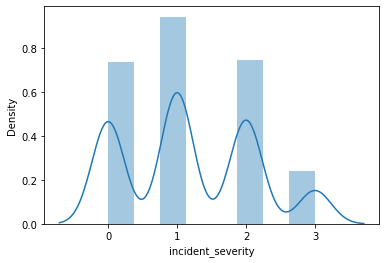

In [35]:
sns.distplot(df2['incident_severity'])

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

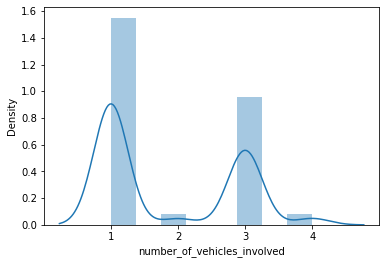

In [36]:
sns.distplot(df2['number_of_vehicles_involved'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

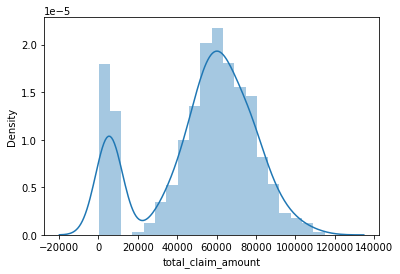

In [37]:
sns.distplot(df2['total_claim_amount'])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

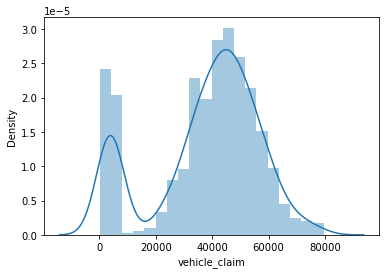

In [38]:
sns.distplot(df2['vehicle_claim'])

<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

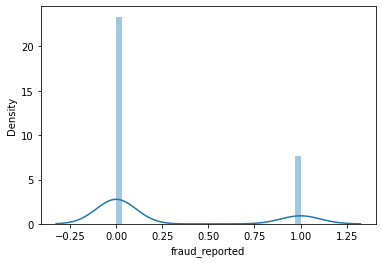

In [39]:
sns.distplot(df2['fraud_reported'])

months_as_customer                AxesSubplot(0.125,0.536818;0.0945122x0.343182)
policy_bind_date               AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
umbrella_limit                 AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
insured_hobbies                AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
insured_relationship           AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
collision_type                 AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
incident_severity              AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
number_of_vehicles_involved          AxesSubplot(0.125,0.125;0.0945122x0.343182)
total_claim_amount                AxesSubplot(0.238415,0.125;0.0945122x0.343182)
vehicle_claim                     AxesSubplot(0.351829,0.125;0.0945122x0.343182)
fraud_reported                    AxesSubplot(0.465244,0.125;0.0945122x0.343182)
dtype: object

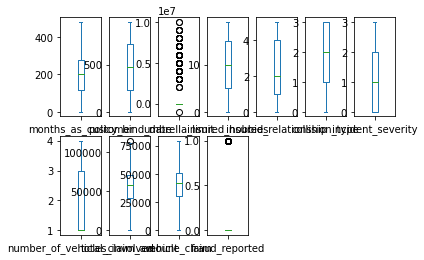

In [40]:
df2.plot(kind='box',subplots=True,layout=(2,7))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

As we have outliers in the data so we need to remove outliers first

In [41]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

,months_as_customer,policy_bind_date,umbrella_limit,insured_hobbies,insured_relationship,collision_type,incident_severity,number_of_vehicles_involved,total_claim_amount,vehicle_claim,fraud_reported
0,1.078140,0.209500,0.479476,1.281737,1.437957,1.254675,1.260614,0.823865,0.714257,0.749653,1.746019
1,0.208995,1.259397,1.697980,0.929078,0.247595,1.566933,0.195906,0.823865,1.807312,1.823346,1.746019
2,0.608002,1.047470,1.697980,1.363201,0.347586,0.314139,0.195906,1.140056,0.686362,0.785565,0.572731
3,0.452355,1.059589,2.133471,1.363201,0.942766,0.626397,1.260614,0.823865,0.403135,0.677607,1.746019
4,0.208995,1.065634,2.133471,1.363201,0.942766,1.566933,0.195906,0.823865,1.753121,1.768252,0.572731
...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.046021,0.479476,0.576420,0.942766,0.626397,0.195906,0.823865,1.305049,1.224309,0.572731
996,0.704407,1.254543,0.479476,1.281737,1.537947,0.314139,1.260614,0.823865,2.111466,1.821868,0.572731
997,0.642767,0.125944,0.826998,1.186872,0.247595,1.254675,0.195906,1.140056,0.558507,0.771902,0.572731
998,2.208028,0.358447,1.697980,1.715859,1.537947,0.314139,1.260614,0.823865,0.219110,0.073580,0.572731


In [42]:
z=np.abs(zscore(df2))

In [43]:
z.shape

(1000, 11)

In [44]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 503, 657, 700, 875,
       922, 975], dtype=int64), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))


In [45]:
len(np.where(z>3)[0])

15

In [46]:
df3=df2[(z<3).all(axis=1)]

In [47]:
print("old dataframe",df2.shape)
print("new dataframe",df3.shape)
print("total dropped",df2.shape[0]-df3.shape[0])

old dataframe (1000, 11)
new dataframe (985, 11)
total dropped 15


In [48]:
loss_percent=(1000-985)/1000*100
print(loss_percent,"%")
#here by removing the outliers loosign 1.5% of data which is fine as it will help in gettign better model accuracy

1.5 %


In [49]:
#we will now check skewness in data
df3.skew()

months_as_customer             0.365896
policy_bind_date               0.000778
umbrella_limit                 1.809619
insured_hobbies               -0.061536
insured_relationship           0.077333
collision_type                -0.194288
incident_severity              0.281858
number_of_vehicles_involved    0.509302
total_claim_amount            -0.596347
vehicle_claim                 -0.623873
fraud_reported                 1.189694
dtype: float64

In [50]:
# We will break data into input and output and then remove skewness
x=df3.drop("fraud_reported",axis=1)
y=df3["fraud_reported"]

In [51]:
x

,months_as_customer,policy_bind_date,umbrella_limit,insured_hobbies,insured_relationship,collision_type,incident_severity,number_of_vehicles_involved,total_claim_amount,vehicle_claim
0,328,532.0,0,17.0,0.0,3.0,0.0,1,71610,52080
1,228,821.0,5000000,15.0,2.0,0.0,1.0,1,5070,3510
2,134,186.0,5000000,2.0,3.0,2.0,1.0,3,34650,23100
3,256,766.0,6000000,2.0,4.0,1.0,0.0,1,63400,50720
4,228,181.0,6000000,2.0,4.0,0.0,1.0,1,6500,4550
...,...,...,...,...,...,...,...,...,...,...
995,3,487.0,0,13.0,4.0,1.0,1.0,1,87200,61040
996,285,129.0,0,17.0,5.0,2.0,0.0,1,108480,72320
997,130,509.0,3000000,3.0,2.0,3.0,1.0,3,67500,52500
998,458,573.0,5000000,0.0,5.0,2.0,0.0,1,46980,36540


In [52]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: fraud_reported, Length: 985, dtype: float64

In [53]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)


,Variables,VIF Factor
0,months_as_customer,3.691093
1,policy_bind_date,3.528796
2,umbrella_limit,1.217921
3,insured_hobbies,3.340133
4,insured_relationship,2.885574
5,collision_type,5.660089
6,incident_severity,2.272871
7,number_of_vehicles_involved,4.451999
8,total_claim_amount,147.007420
9,vehicle_claim,147.582675


We will drop months_as_customer,total_claim_amount to remove multicollinierity as they have very close VIF with Coapplicant Income

In [54]:
x1=x.drop(['months_as_customer','total_claim_amount'],axis=1)
x1

,policy_bind_date,umbrella_limit,insured_hobbies,insured_relationship,collision_type,incident_severity,number_of_vehicles_involved,vehicle_claim
0,532.0,0,17.0,0.0,3.0,0.0,1,52080
1,821.0,5000000,15.0,2.0,0.0,1.0,1,3510
2,186.0,5000000,2.0,3.0,2.0,1.0,3,23100
3,766.0,6000000,2.0,4.0,1.0,0.0,1,50720
4,181.0,6000000,2.0,4.0,0.0,1.0,1,4550
...,...,...,...,...,...,...,...,...
995,487.0,0,13.0,4.0,1.0,1.0,1,61040
996,129.0,0,17.0,5.0,2.0,0.0,1,72320
997,509.0,3000000,3.0,2.0,3.0,1.0,3,52500
998,573.0,5000000,0.0,5.0,2.0,0.0,1,36540


In [55]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [56]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0   -0.295261
1   -7.967493
2   -0.247760
3   -0.160124
4   -0.204105
5   -0.078645
6    0.372998
7   -0.523516
dtype: float64

In [57]:
#using scaling technique for scaling of independent data
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x2=st.fit_transform(x2)
x2

array([[ 0.29430656, -0.33585917,  1.22446489, ..., -1.37048768,
        -0.83927238,  0.75692815],
       [ 1.17910921,  1.48650539,  0.91736161, ..., -0.06493991,
        -0.83927238, -1.78746172],
       [-1.0024988 ,  1.48650539, -1.40320784, ..., -0.06493991,
         1.19503293, -0.82161121],
       ...,
       [ 0.21838637,  0.84307498, -1.18690604, ..., -0.06493991,
         1.19503293,  0.78054046],
       [ 0.42726286,  1.48650539, -1.89694258, ..., -1.37048768,
        -0.83927238, -0.10352505],
       [-0.30532268, -0.33585917,  0.27632857, ..., -0.06493991,
        -0.83927238, -1.77993886]])

Now we have our input and output ready to be tested for model , As our output is Binary , we will test with Logistic Regression

In [58]:
lr=LogisticRegression()

In [59]:
#finding best random state

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=.20,random_state=i)
    lr.fit(x2_train,y_train)
    predlr=lr.predict(x2_test)
    acc=accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

accuracy 0.8020304568527918 random_state 1
accuracy 0.7817258883248731 random_state 2
accuracy 0.8324873096446701 random_state 3
accuracy 0.8223350253807107 random_state 4
accuracy 0.8020304568527918 random_state 5
accuracy 0.7715736040609137 random_state 6
accuracy 0.7715736040609137 random_state 7
accuracy 0.7817258883248731 random_state 8
accuracy 0.8020304568527918 random_state 9
accuracy 0.8324873096446701 random_state 10
accuracy 0.7969543147208121 random_state 11
accuracy 0.8020304568527918 random_state 12
accuracy 0.8274111675126904 random_state 13
accuracy 0.766497461928934 random_state 14
accuracy 0.7868020304568528 random_state 15
accuracy 0.7868020304568528 random_state 16
accuracy 0.7817258883248731 random_state 17
accuracy 0.817258883248731 random_state 18
accuracy 0.751269035532995 random_state 19
accuracy 0.7614213197969543 random_state 20
accuracy 0.7614213197969543 random_state 21
accuracy 0.8020304568527918 random_state 22
accuracy 0.7918781725888325 random_state 23


accuracy 0.8121827411167513 random_state 189
accuracy 0.8071065989847716 random_state 190
accuracy 0.7766497461928934 random_state 191
accuracy 0.7715736040609137 random_state 192
accuracy 0.817258883248731 random_state 193
accuracy 0.7563451776649747 random_state 194
accuracy 0.7614213197969543 random_state 195
accuracy 0.7766497461928934 random_state 196
accuracy 0.7817258883248731 random_state 197
accuracy 0.7918781725888325 random_state 198
accuracy 0.7868020304568528 random_state 199
Best Accuracy is 0.8578680203045685 on Random State 104


In [60]:
#Applying the above parameters to Logistic Regression 
lr=LogisticRegression()
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=.20,random_state=104)
lr.fit(x2_train,y_train)
predlr=lr.predict(x2_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
cvscore=cross_val_score(lr,x2,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.8578680203045685
[[142  14]
 [ 14  27]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       156
         1.0       0.66      0.66      0.66        41

    accuracy                           0.86       197
   macro avg       0.78      0.78      0.78       197
weighted avg       0.86      0.86      0.86       197

cross val score: 0.782741116751269


In [61]:
#Lets try with RandomForest Classifier model
from sklearn.ensemble import RandomForestClassifier
rfs=RandomForestClassifier(n_estimators=100,random_state=4)
rfs.fit(x2_train,y_train)
predrfs=rfs.predict(x2_test)
print(accuracy_score(y_test,predrfs))
print(confusion_matrix(y_test,predrfs))
print(classification_report(y_test,predrfs))
cvscore1=cross_val_score(rfs,x2,y,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.8223350253807107
[[136  20]
 [ 15  26]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       156
         1.0       0.57      0.63      0.60        41

    accuracy                           0.82       197
   macro avg       0.73      0.75      0.74       197
weighted avg       0.83      0.82      0.83       197

cross val score: 0.798984771573604


In [62]:
#using Kneighbors Classifier to check results
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x2_train,y_train)
knn.score(x2_train,y_train)
predknn=knn.predict(x2_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
cvscore2=cross_val_score(knn,x2,y,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.817258883248731
[[140  16]
 [ 20  21]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       156
         1.0       0.57      0.51      0.54        41

    accuracy                           0.82       197
   macro avg       0.72      0.70      0.71       197
weighted avg       0.81      0.82      0.81       197

cross val score: 0.7563451776649746


In [73]:
#using support vector classifier
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x2_train,y_train)
svc.score(x2_train,y_train)
predsvc=svc.predict(x2_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
cvscore3=cross_val_score(svc,x2,y,cv=5)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.8527918781725888
[[137  19]
 [ 10  31]]
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       156
         1.0       0.62      0.76      0.68        41

    accuracy                           0.85       197
   macro avg       0.78      0.82      0.79       197
weighted avg       0.87      0.85      0.86       197

cross val score: 0.797969543147208


In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x2_train,y_train)
dtc.score(x2_train,y_train)
preddtc=dtc.predict(x2_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
cvscore4=cross_val_score(dtc,x2,y,cv=5)
cvm4=cvscore4.mean()
print("cross val score:",cvm4)

0.7969543147208121
[[137  19]
 [ 21  20]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       156
         1.0       0.51      0.49      0.50        41

    accuracy                           0.80       197
   macro avg       0.69      0.68      0.69       197
weighted avg       0.79      0.80      0.80       197

cross val score: 0.7614213197969544


In [65]:
#Trying to boost the learning of decision tree classifier, estimators by default is 50

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x2_train,y_train)
ad_pred=ad.predict(x2_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))
cvscore5=cross_val_score(ad,x2,y,cv=5)
cvm5=cvscore5.mean()
print("cross val score:",cvm5)

0.8375634517766497
[[139  17]
 [ 15  26]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       156
         1.0       0.60      0.63      0.62        41

    accuracy                           0.84       197
   macro avg       0.75      0.76      0.76       197
weighted avg       0.84      0.84      0.84       197

cross val score: 0.797969543147208


In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x2_train,y_train)
gb_pred=gb.predict(x2_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
cvscore6=cross_val_score(gb,x2,y,cv=5)
cvm6=cvscore6.mean()
print("cross val score:",cvm6)

0.8274111675126904
[[134  22]
 [ 12  29]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       156
         1.0       0.57      0.71      0.63        41

    accuracy                           0.83       197
   macro avg       0.74      0.78      0.76       197
weighted avg       0.85      0.83      0.83       197

cross val score: 0.8131979695431472


Hypertuning below for the algorithm selected as Random Forest Classifier

In [67]:
RandomForestClassifier()

RandomForestClassifier()

In [68]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini','entropy']}

In [69]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x2_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'log2'}

In [70]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [71]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2')

In [72]:
GCV_pred=GCV.best_estimator_.predict(x2_test)
accuracy_score(y_test,GCV_pred)
print(accuracy_score(y_test,GCV_pred))
print(confusion_matrix(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))
cvscore7=cross_val_score(GCV.best_estimator_,x2,y,cv=5)
cvm7=cvscore7.mean()
print("cross val score:",cvm7)

0.8324873096446701
[[136  20]
 [ 13  28]]
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       156
         1.0       0.58      0.68      0.63        41

    accuracy                           0.83       197
   macro avg       0.75      0.78      0.76       197
weighted avg       0.84      0.83      0.84       197

cross val score: 0.8142131979695432


Logistic Regression comes with 85% accuracy score , 86% accuracy in F1 Score and 78 % Cross Val Score

RandomForestClassifier 82% accuracy score ,82 % accuracy in F1 score and 79 % Cross Val score

KNeighborsClassifier 81 % accuracy , 82 % accuracy in F1 score and 75 % Cross Val score

support vector classifier using kernel as rbf 85 % accuracy , 85 % accuracy in F1 score and 79 % Cross Val score

DecisionTreeClassifier 76% accuracy , 80 % accuracy in F1 score and 76 % Cross Val score

AdaBoostClassifier 83 % accuracy , 84 % accuracy in F1 score and 79 % Cross Val score

GradientBoostingClassifier 82 % accuracy , 83 % accuracy in F1 score and 81 % Cross Val score

By doing Hypertuning using RandomForestClassifier with best param 83 % accuracy , 83 % accuracy in F1 score and 81 % Cross Val score

We select Hypertuned RandomForestClassifier with best param 83 % accuracy , 83 % accuracy in F1 score and 81 % Cross Val score as final model



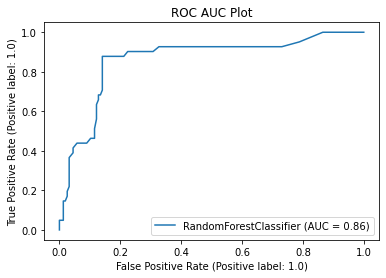

In [74]:
#Lets plot AUC ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x2_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [75]:
#we will save this model
import pickle

In [76]:
filename='claimfraud.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [77]:
#Conclusion 
loaded_model=pickle.load(open('claimfraud.pkl','rb'))
result=loaded_model.score(x2_test,y_test)
print(result)
                        

0.8324873096446701


In [81]:
#predicting the rain tomorrow using the model saved
conclusion=pd.DataFrame([loaded_model.predict(x2_test)[:],GCV_pred[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
Predicted,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Original,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
